In [62]:
import pandas as pd
import numpy as np
df = pd.read_csv('hotel_bookings.csv')
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [63]:
#combining date columns into a single pandas date time format 
df['date'] =pd.to_datetime(df.arrival_date_year.astype(str) + df.arrival_date_month.astype(str) + df.arrival_date_day_of_month.astype(str), format='%Y%B%d')
df['date'].dtype #data frame now contains a pandas date time format date column

dtype('<M8[ns]')

In [64]:
#dropping all irrelevant variables 
df = df.drop(['hotel','arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'], axis=1)

# Extracting 2017 Observations

In [65]:
#we only want dates past start of 2017
df = df.loc[(df['date'] >= '2017-01-01')& (df['date'] <= '2017-12-31')]
df.count()

is_canceled    40687
lead_time      40687
date           40687
dtype: int64

# Randomly Selecting Observations (10% of data)

In [66]:
### extract a random sample of 4068 for a two sample Mann Whitney U test test for comapring medians
df = df.sample(n=4068)

Below, we see our lead time sample is highly skewed for canceled bookings

Canceled bookings skewness: 1.402113537534637


<AxesSubplot:>

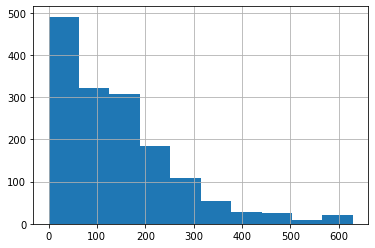

In [67]:
#check for outliers/skewness in our dataset for canceled bookings
print('Canceled bookings skewness:', df[df.is_canceled==1].lead_time.skew())
df[df.is_canceled==1].lead_time.hist()

Below, we see our lead time sample is highly skewed for not canceled bookings

Not Canceled bookings skewness: 1.435013296995035


<AxesSubplot:>

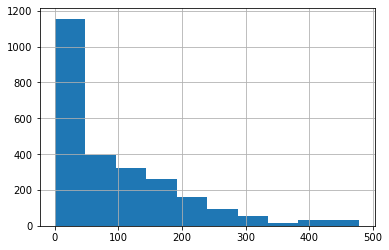

In [68]:
#check for outliers/skewness in our dataset for not canceled bookings
print('Not Canceled bookings skewness:', df[df.is_canceled==0].lead_time.skew())
df[df.is_canceled==0].lead_time.hist()

Below, we remove outliers using box plot calculations and IQR for canceled and not canceled bookings

In [69]:
#Since skewness is higher than moderate let's remove any outliers using box plot calculations
#Canceled bookings outliers
df.sort_values("lead_time")
q1_canceled, q3_canceled= np.percentile(df[df.is_canceled==1].lead_time,[25,75])
print('Q1:', q1_canceled)
print('Q3:',q3_canceled)

iqr_canceled = q3_canceled - q1_canceled

lower_bound_canceled = q1_canceled -(1.5 * iqr_canceled)
upper_bound_canceled = q3_canceled +(1.5 * iqr_canceled)

print('Lower Bound_canceled:', lower_bound_canceled)
print('Upper Bound_canceled:', upper_bound_canceled)


Q1: 53.0
Q3: 205.0
Lower Bound_canceled: -175.0
Upper Bound_canceled: 433.0


In [70]:
##Since skewness is higher than moderate let's remove any outliers using box plot calculations
#Not Canceled bookings outliers
q1_not_canceled, q3_not_canceled= np.percentile(df[df.is_canceled==0].lead_time,[25,75])
print('Q1:', q1_not_canceled)
print('Q3:',q3_not_canceled)

iqr_not_canceled = q3_not_canceled - q1_not_canceled

lower_bound_not_canceled = q1_not_canceled -(1.5 * iqr_not_canceled)
upper_bound_not_canceled = q3_not_canceled +(1.5 * iqr_not_canceled)

print('Lower Bound_not_canceled:', lower_bound_not_canceled)
print('Upper Bound_not_canceled:', upper_bound_not_canceled)


Q1: 11.0
Q3: 146.0
Lower Bound_not_canceled: -191.5
Upper Bound_not_canceled: 348.5


Below, we created a new dataset that only includes lead_time, date and whether it was canceled or not EXCLUDING outliers

In [87]:
#will filter out outliers from previous calculations and create one dataframe for it
df1 = df[(df.is_canceled==1) & (df.lead_time>lower_bound_canceled) & (df.lead_time<upper_bound_canceled)]
df2 = df[(df.is_canceled==0) & (df.lead_time>lower_bound_not_canceled) & (df.lead_time<upper_bound_not_canceled)]

df = pd.concat([df1, df2], ignore_index=True)
df

,is_canceled,lead_time,date
0,1,211,2017-08-19
1,1,214,2017-08-18
2,1,205,2017-04-10
3,1,0,2017-08-17
4,1,99,2017-03-23
...,...,...,...
3937,0,257,2017-05-09
3938,0,126,2017-02-02
3939,0,88,2017-03-15
3940,0,87,2017-05-04


Skewness is lower than before in the new dataset

Canceled bookings skewness: 0.7947723620139879
Not_Canceled bookings skewness: 0.9840302396862864


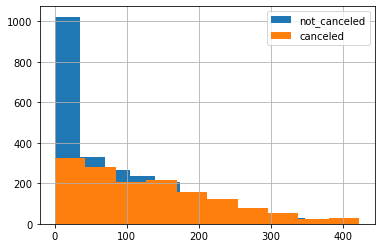

In [94]:
#Now we can see that skewness is lower
print('Canceled bookings skewness:', df[df.is_canceled==1].lead_time.skew())
print('Not_Canceled bookings skewness:', df[df.is_canceled==0].lead_time.skew())

df[df.is_canceled==0].lead_time.hist(label='not_canceled')
df[df.is_canceled==1].lead_time.hist(label='canceled')
plt.legend()

Let's explore lead times with bins of 50

<AxesSubplot:>

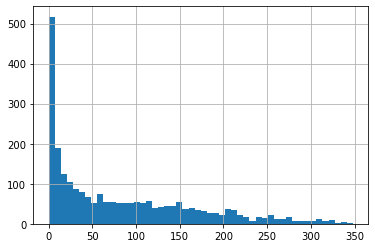

In [95]:
df_new=df[df.is_canceled==1]
df_new0=df[df.is_canceled==0]
df_new['lead_time'].value_counts()

df_new0.lead_time.hist(bins=50)

# Percent Lead Time Cancellations (Bin size=50)

In [96]:
#Create custom binning for lead_time
df_new=df[df.is_canceled==1]

df0_new = df_new.loc[(df_new['lead_time'] >= 0) & (df_new['lead_time'] < 50)]
df1_new = df_new.loc[(df_new['lead_time'] >= 50) & (df_new['lead_time'] < 100)]
df2_new = df_new.loc[(df_new['lead_time'] >= 100) & (df_new['lead_time'] < 150)]
df3_new = df_new.loc[(df_new['lead_time'] >= 150) & (df_new['lead_time'] < 200)]
df4_new = df_new.loc[(df_new['lead_time'] >= 200) & (df_new['lead_time'] < 250)]
df5_new = df_new.loc[(df_new['lead_time'] >= 250) & (df_new['lead_time'] < 300)]
df6_new = df_new.loc[(df_new['lead_time'] >= 300) & (df_new['lead_time'] < 350)]
df7_new = df_new.loc[(df_new['lead_time'] >= 350)]

#Storing the bins as percents
df0=(df0_new.lead_time.count()/df_new.lead_time.count())*100
df1=(df1_new.lead_time.count()/df_new.lead_time.count())*100
df2=(df2_new.lead_time.count()/df_new.lead_time.count())*100
df3=(df3_new.lead_time.count()/df_new.lead_time.count())*100
df4=(df4_new.lead_time.count()/df_new.lead_time.count())*100
df5=(df5_new.lead_time.count()/df_new.lead_time.count())*100
df6=(df6_new.lead_time.count()/df_new.lead_time.count())*100
df7=(df7_new.lead_time.count()/df_new.lead_time.count())*100

The chart belows shows, 45.48% of the cancellations occurred with a lead time less than 100 days. The closer a booking is made relative to the arrival date, the more likely that booking may be canceled.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

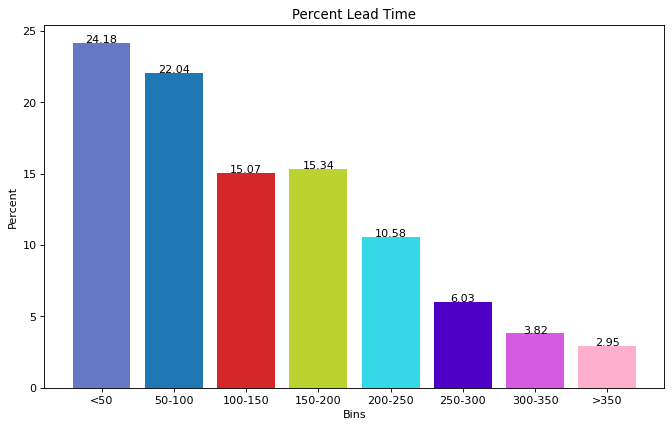

In [75]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10,6), dpi=80)
colors = ['#6578C6', '#1f77b4', '#d62728', '#BCD32F', '#34D8E7',
          '#4E00C6', '#D55BE0', '#FFAFCE']

values=[round(df0,2),round(df1,2),round(df2,2),round(df3,2),round(df4,2),round(df5,2),round(df6,2),round(df7,2)]
ranges=['<50','50-100','100-150','150-200','200-250','250-300','300-350','>350']
plot1 = plt.bar(ranges,values, color=colors)


def addlabels(ranges,values):
    for i in range(len(ranges)):
        plt.text(i,values[i],values[i], ha='center')
addlabels(ranges,values)

plt.title("Percent Lead Time")
plt.xlabel("Bins")
plt.ylabel("Percent")
plt.xticks(rotation=0)

# Percent Lead Time Non-Cancellations (Bin size=50)


In [77]:
#Create custom binning for lead_time
df_new0=df[df.is_canceled==0]

df0_new0 = df_new0.loc[(df_new0['lead_time'] >= 0) & (df_new0['lead_time'] < 50)]
df1_new0 = df_new0.loc[(df_new0['lead_time'] >= 50) & (df_new0['lead_time'] < 100)]
df2_new0 = df_new0.loc[(df_new0['lead_time'] >= 100) & (df_new0['lead_time'] < 150)]
df3_new0 = df_new0.loc[(df_new0['lead_time'] >= 150) & (df_new0['lead_time'] < 200)]
df4_new0 = df_new0.loc[(df_new0['lead_time'] >= 200) & (df_new0['lead_time'] < 250)]
df5_new0 = df_new0.loc[(df_new0['lead_time'] >= 250) & (df_new0['lead_time'] < 300)]
df6_new0 = df_new0.loc[(df_new0['lead_time'] >= 300) & (df_new0['lead_time'] < 350)]
df7_new0 = df_new0.loc[(df_new0['lead_time'] >= 350)]

#Storing the bins as percents
df0=(df0_new0.lead_time.count()/df_new0.lead_time.count())*100
df1=(df1_new0.lead_time.count()/df_new0.lead_time.count())*100
df2=(df2_new0.lead_time.count()/df_new0.lead_time.count())*100
df3=(df3_new0.lead_time.count()/df_new0.lead_time.count())*100
df4=(df4_new0.lead_time.count()/df_new0.lead_time.count())*100
df5=(df5_new0.lead_time.count()/df_new0.lead_time.count())*100
df6=(df6_new0.lead_time.count()/df_new0.lead_time.count())*100
df7=(df7_new0.lead_time.count()/df_new0.lead_time.count())*100

Most of the bookings that were not canceled had a lead time of less than 50 days

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

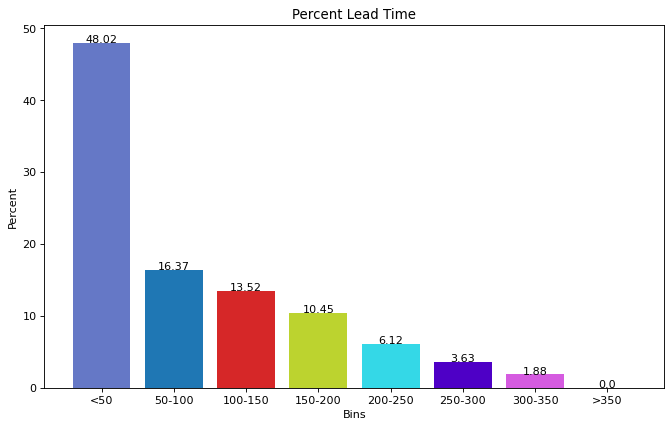

In [78]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(figsize=(10,6), dpi=80)
colors = ['#6578C6', '#1f77b4', '#d62728', '#BCD32F', '#34D8E7',
          '#4E00C6', '#D55BE0', '#FFAFCE']
values=[round(df0,2),round(df1,2),round(df2,2),round(df3,2),round(df4,2),round(df5,2),round(df6,2),round(df7,2)]
ranges=['<50','50-100','100-150','150-200','200-250','250-300','300-350','>350']
plot1 = plt.bar(ranges,values, color=colors)

def addlabels(ranges,values):
    for i in range(len(ranges)):
        plt.text(i,values[i],values[i], ha='center')
addlabels(ranges,values)

plt.title("Percent Lead Time")
plt.xlabel("Bins")
plt.ylabel("Percent")
plt.xticks(rotation=0)


# Insight Drawn:

Most of the cancellations occurred under 100 days, however, for bookings that were not cancelled the majority lead time was below 50 days. This means that the closer a booking is made to the arrival date the less likely that booking will be canceled and the farther out the booking is made from the arrival date the more likely that booking will be canceled

However, we must run a test to see if this is statistically signficant

# Choice of Test:

Since our data is highly skewed even after removing outliers, we will use a non-parametric test to compare the lead time medians for canceled and non canceled bookings. A Mann-Whitney-U test is conducted below

# Mann-Whitney-U Test

Assumptions of the test:

-The dependent variable should be measured on an ordinal scale or a continuous scale.

-The independent variable should be two independent, categorical groups.

-Observations should be independent. In other words, there should be no relationship between the two groups or within each group.

-Observations are not normally distributed. However, they should follow the same shape (i.e. both are bell-shaped and skewed left).


# Hypothesis:

Null Hpythesis: the probability is 50% that a randomly drawn customer of the canceled lead time sample will exceed a lead time of the not canceled lead time sample. 

Alternative Hypthesis: the probability is NOT 50% that a randomly drawn customer of the canceled lead time sample will exceed a lead time of the not canceled lead time sample. 

In [79]:
pip install pingouin #import pingouin package

Note: you may need to restart the kernel to use updated packages.


In [80]:
canceled_lead_time = df[df.is_canceled==1].lead_time
not_canceled_lead_time = df[df.is_canceled==0].lead_time

In [81]:
import pingouin as pg
pg.mwu(canceled_lead_time, not_canceled_lead_time, tail='two-sided')

,U-val,tail,p-val,RBC,CLES
MWU,2414360.0,two-sided,3.608763e-64,-0.320637,0.660318


In [82]:
canceled_lead_time.median()

111.0

In [83]:
not_canceled_lead_time.median()

56.0

# Conclusion:

Our test results have a p-value less than .05, therefore, we reject the null hypothesis and accept our alternative hypothesis. The probability is NOT 50% that a randomly drawn customer of the canceled lead time sample will exceed a lead time of the not canceled lead time sample. Since our data is highley skewed we cannot include a Z statistic in our results.

Median lead time in canceled and not canceled groups was 111.0 and 56.0. The distributions in the two groups differed significantly (Mann–Whitney U = 2414360.0, n1 (canceled) = 1493, n2 (not_canceled) = 2449, P < 0.05 two-tailed).

The probability of canceled bookings having a larger lead time than lead time of non canceled bookings is 66%. Thus, canceled bookings were booked farther out relative to the bookings arrival date than not canceled bookings. Non canceled bookings were booked closer to the bookings arrival date compared to canceled bookings.


In [84]:
canceled_lead_time.count()

1493

In [85]:
not_canceled_lead_time.count()

2449